In [1]:
from tools import analytics

In [2]:
CFG_PATH = "core/configs/task23/retina_P1.py"
SET_TYPE = "train"
BATCH_SIZE = 1 

cfg_file = analytics.get_config(CFG_PATH)
cfg, dataset, gpu_tfms = analytics.prepare_dataset(cfg_file, dataset_type=SET_TYPE, batch_size=BATCH_SIZE)
img_mean, img_std = analytics.calculate_mean_std(cfg)

cfg_file = analytics.get_config(CFG_PATH)
cfg, _, _ = analytics.prepare_dataset(cfg_file, dataset_type=SET_TYPE, batch_size=BATCH_SIZE)
metadata = analytics.load_annotation_file(cfg, SET_TYPE)
annotations = analytics.process_annotations(metadata["annotations"])


metadata = analytics.load_annotation_file(cfg, SET_TYPE)
annotations = analytics.process_annotations(metadata["annotations"])
catagories = analytics.process_categories(metadata["categories"])

In [3]:
# Replace category_id with category_name from catagories
annotations["category_id"] = annotations["category_id"].map(catagories.set_index("id")["name"])

tnno = analytics.remove_outliers(annotations)

/home/andy/dev/neuralvision/tools/analytics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/home/andy/dev/neuralvision/tools/analytics.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


In [4]:
annotations.drop(columns=["id", "image_id", "category_id"]).describe().round(3)

,area,xmin,ymin,xmax,ymax,width,height
count,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000
mean,682.515,411.209,72.322,431.375,98.958,19.565,26.512
std,1164.599,295.329,10.378,296.308,19.031,22.310,15.365
min,19.418,0.000,42.530,9.194,65.076,2.410,6.154
25%,121.077,118.700,66.045,143.230,84.070,6.930,13.910
50%,261.116,457.570,72.060,475.260,94.030,12.710,22.310
75%,675.330,556.535,77.990,577.260,116.385,22.030,36.285
max,7334.665,1006.800,102.710,1024.000,128.000,136.518,78.073


In [5]:
tnno.drop(columns=["id", "image_id", "category_id"]).describe().round(3)

,area,xmin,ymin,xmax,ymax,width,height
count,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000
mean,682.515,411.209,72.322,431.375,98.958,19.565,26.512
std,1164.599,295.329,10.378,296.308,19.031,22.310,15.365
min,19.418,0.000,42.530,9.194,65.076,2.410,6.154
25%,121.077,118.700,66.045,143.230,84.070,6.930,13.910
50%,261.116,457.570,72.060,475.260,94.030,12.710,22.310
75%,675.330,556.535,77.990,577.260,116.385,22.030,36.285
max,7334.665,1006.800,102.710,1024.000,128.000,136.518,78.073


In [6]:
unique_catagories = annotations["category_id"].unique().tolist()

### Statistics of Average Bounding Boxes 

In [7]:
# agressive_range = [0.1, 0.9]
analytics.get_avg_box_metrics(tnno, unique_catagories=unique_catagories)

,type,car,person,scooter,bicycle,rider,bus,truck
0,area,731.94,191.12,278.52,282.77,242.35,1067.2,1842.69
1,aspect,14:13,7:26,9:29,13:20,2:7,33:31,41:44
2,width,28.13,7.15,9.4,13.7,8.45,33.89,41.53
3,height,26.02,26.73,29.63,20.64,28.68,31.49,44.37


In [8]:
# agressive_range = [0.1, 0.9]
# tnno = analytics.remove_outliers(annotations, qrange=agressive_range)
# analytics.get_avg_box_metrics(tnno, unique_catagories=unique_catagories)

In [9]:
# tmp = annotations.drop(columns=["id", "image_id", "category_id"])
# clean_annotations = analytics.remove_outliers(tmp)

In [10]:
# analytics.get_avg_box_metrics(clean_annotations, unique_catagories=unique_catagories)

In [11]:
#analytics.view_aspect_ratio_distribution(annotations, xscale=(0, 4))

In [12]:
#agressive_range = [0.1, 0.9]
#clean_annotations = analytics.remove_outliers(annotations, qrange=agressive_range);

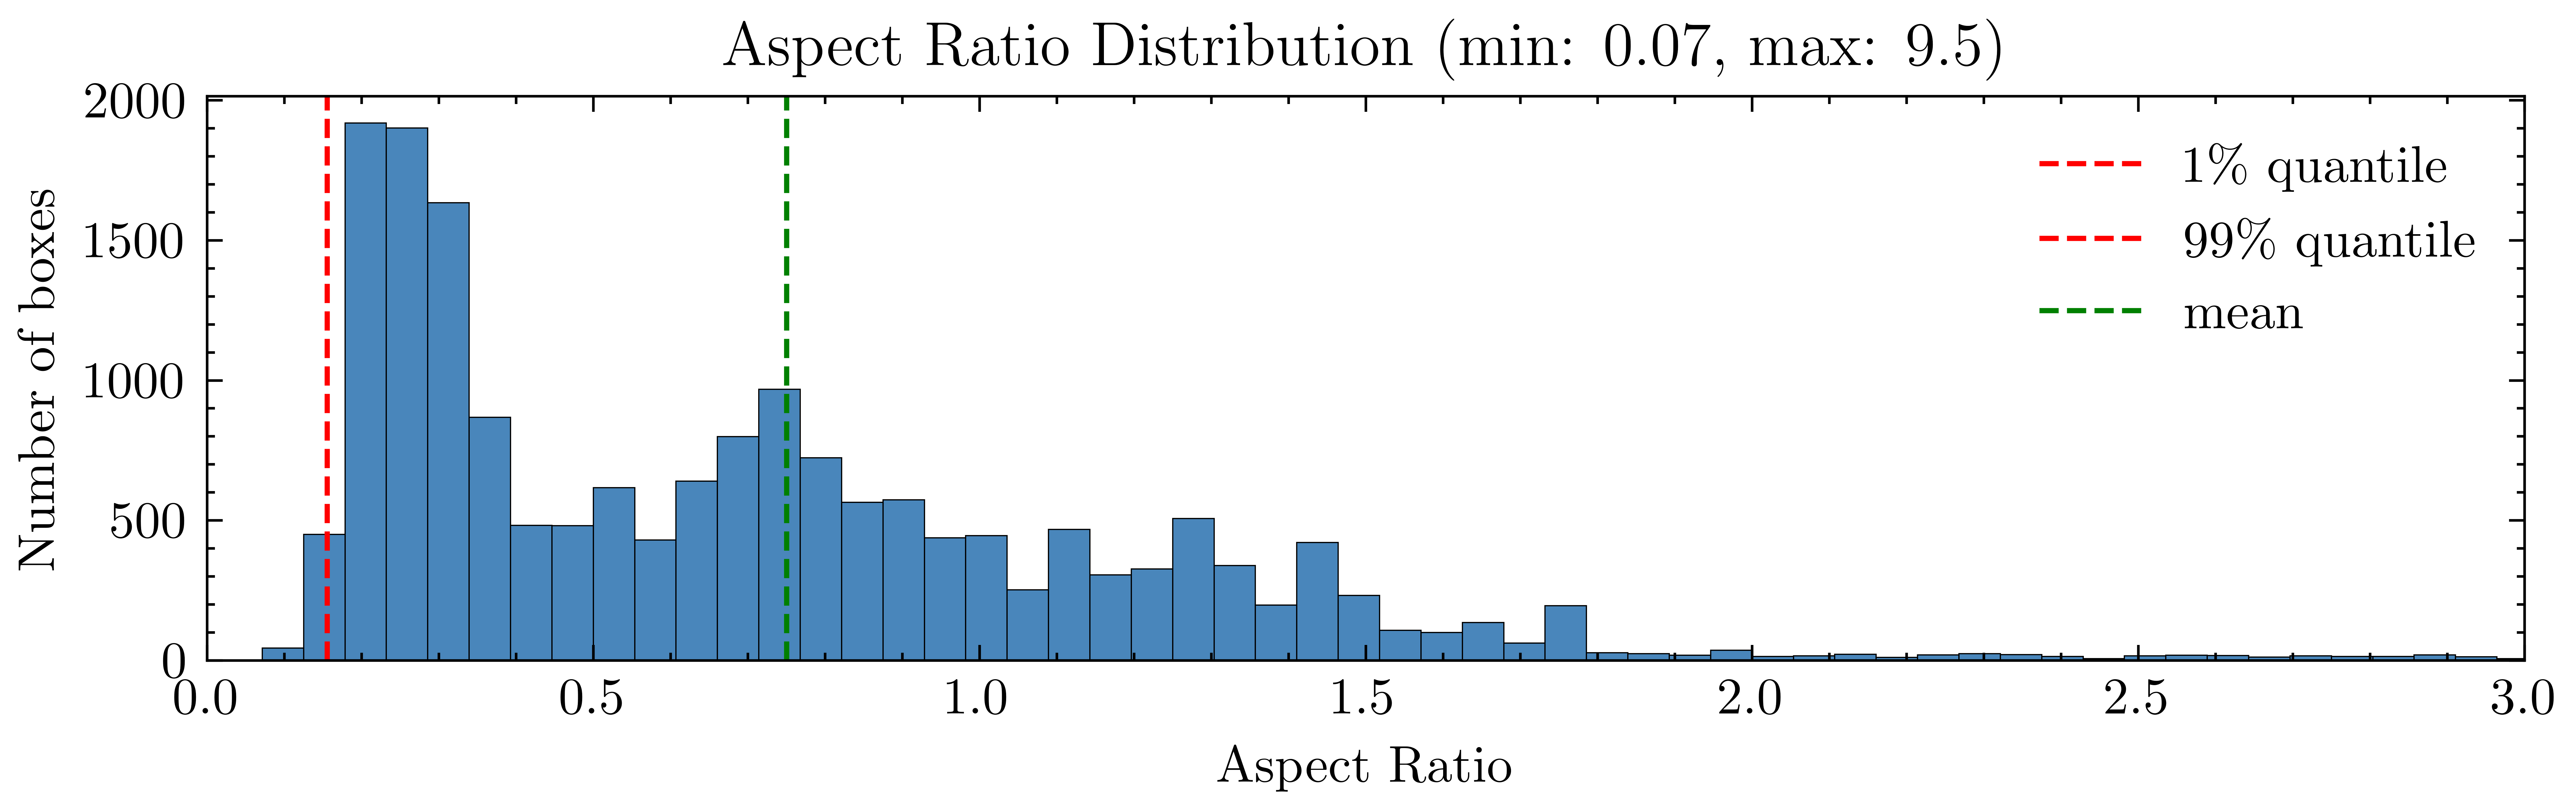

In [13]:
analytics.view_aspect_ratio_distribution(annotations, xscale=(0, 3))

In [14]:
#tmp_anno = clean_annotations[clean_annotations["category_id"] == "car"]
#analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2.1))

In [15]:
#tmp_anno = clean_annotations[clean_annotations["category_id"] == "person"]
#analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 0.8))

In [16]:
#tmp_anno = clean_annotations[clean_annotations["category_id"] == "rider"]
#analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 0.8))

In [17]:
#tmp_anno = clean_annotations[clean_annotations["category_id"] == "bicycle"]
#analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2))

In [18]:
#tmp_anno = clean_annotations[clean_annotations["category_id"] == "scooter"]
#analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0.1, 0.6))

In [19]:
#tmp_anno = clean_annotations[clean_annotations["category_id"] == "truck"]
#analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2))

In [20]:
#tmp_anno = clean_annotations[clean_annotations["category_id"] == "bus"]
#analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2))

In [21]:
import sys
import numpy as np

from sklearn.cluster import KMeans

def load_boxes(_annotations, rescale_width=None, rescale_height=None):
  """Extracts bounding-box widths and heights from ground-truth dataset.

  Args:
  path : Path to .xml annotation files for your dataset.
  rescale_width : Scaling factor to rescale width of bounding box.
  rescale_height : Scaling factor to rescale height of bounding box.

  Returns:
  bboxes : A numpy array with pairs of box dimensions as [width, height].
  """
  res = []

  for row in _annotations.itertuples():
      bbox_width = row.width
      bbox_height = row.height
      if rescale_width and rescale_height:
        bbox_width = bbox_width/rescale_width
        bbox_height = bbox_height/rescale_height
      if bbox_width <= 0 or bbox_height <= 0:
        print("Invalid bounding box with width and height <= 0: {}".format(row))
      res.append([bbox_width, bbox_height])
  bboxes = np.array(res)
  return bboxes


def average_iou(bboxes, anchors):
    """Calculates the Intersection over Union (IoU) between bounding boxes and
    anchors.

    Args:
    bboxes : Array of bounding boxes in [width, height] format.
    anchors : Array of aspect ratios [n, 2] format.

    Returns:
    avg_iou_perc : A Float value, average of IOU scores from each aspect ratio
    """
    intersection_width = np.minimum(anchors[:, [0]], bboxes[:, 0]).T
    intersection_height = np.minimum(anchors[:, [1]], bboxes[:, 1]).T

    if np.any(intersection_width == 0) or np.any(intersection_height == 0):
        raise ValueError("Some boxes have zero size.")

    intersection_area = intersection_width * intersection_height
    boxes_area = np.prod(bboxes, axis=1, keepdims=True)
    anchors_area = np.prod(anchors, axis=1, keepdims=True).T
    union_area = boxes_area + anchors_area - intersection_area
    avg_iou_perc = np.mean(np.max(intersection_area / union_area, axis=1)) * 100

    return avg_iou_perc

def kmeans_aspect_ratios(bboxes, kmeans_max_iter, num_aspect_ratios):
  """Calculate the centroid of bounding boxes clusters using Kmeans algorithm.

  Args:
  bboxes : Array of bounding boxes in [width, height] format.
  kmeans_max_iter : Maximum number of iterations to find centroids.
  num_aspect_ratios : Number of centroids to optimize kmeans.

  Returns:
  aspect_ratios : Centroids of cluster (optmised for dataset).
  avg_iou_prec : Average score of bboxes intersecting with new aspect ratios.
  """

  assert len(bboxes), "You must provide bounding boxes"

  normalized_bboxes = bboxes / np.sqrt(bboxes.prod(axis=1, keepdims=True))

  # Using kmeans to find centroids of the width/height clusters
  kmeans = KMeans(
      init='random', n_clusters=num_aspect_ratios, random_state=1337, max_iter=kmeans_max_iter)
  kmeans.fit(X=normalized_bboxes)
  ar = kmeans.cluster_centers_

  assert len(ar), "Unable to find k-means centroid, try increasing kmeans_max_iter."

  avg_iou_perc = average_iou(normalized_bboxes, ar)

  if not np.isfinite(avg_iou_perc):
    sys.exit("Failed to get aspect ratios due to numerical errors in k-means")

  aspect_ratios = [w/h for w,h in ar]

  return aspect_ratios, avg_iou_perc, ar

def _calculate_aspect(width: int, height: int) -> str:
    width, height = int(width), int(height)

    def gcd(a, b):
        """highest number that evenly divides both width and height."""
        return a if b == 0 else gcd(b, a % b)

    r = gcd(width, height)
    x = int(width / r)
    y = int(height / r)

    return f"{x}:{y}"

In [22]:
clean_annotations.mean()

NameError: name 'clean_annotations' is not defined

In [ ]:
# Tune this based on your accuracy/speed goals as described above
num_aspect_ratios = 6 # can be [2,3,4,5,6]

# Tune the iterations based on the size and distribution of your dataset
# You can check avg_iou_prec every 100 iterations to see how centroids converge
kmeans_max_iter = 50000000

# These should match the training pipeline config ('fixed_shape_resizer' param)
width = 1024
height = 128

# Get the ground-truth bounding boxes for our dataset
bboxes = load_boxes(clean_annotations, rescale_width=None, rescale_height=None)

aspect_ratios, avg_iou_perc, AR =  kmeans_aspect_ratios(
                                      bboxes=bboxes,
                                      kmeans_max_iter=kmeans_max_iter,
                                      num_aspect_ratios=num_aspect_ratios)

aspect_ratios = sorted(aspect_ratios)

print('Aspect ratios generated  :', [round(ar, 2) for ar in aspect_ratios])
print('Average IOU with anchors :', avg_iou_perc)
print('Anchors generated :', [ar.round(2).tolist() for ar in AR])

In [ ]:
1/np.array([0.2, 0.27, 0.39, 0.58, 0.84, 1.31])